Neural Networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from numpy import matlib
import qgrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_excel('../data/CTG.xls', sheet_name='Raw Data', header=0, skiprows=[1])
data = df.to_numpy()
# Features matrix
X = data[:,0:22]
Y = data[:,23]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify=Y, shuffle=True)

In [5]:
def redes_neuronales(neuronas, capas_ocultas):
    capas = capas_ocultas*(neuronas,)    
        
    Folds = 4
    random.seed(19680801)
    f1 = np.zeros(Folds)
    auc_fpr = np.zeros(Folds)
    gmean = np.zeros(Folds)

    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        
        #Se normalizan los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = preprocessing.scale(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        #Llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        mlp = MLPClassifier(hidden_layer_sizes=capas,activation = 'relu',max_iter=1000)
        mlp.fit(Xtrain,Ytrain)
        
        #Validación con las muestras de entrenamiento
        Ytrain_pred = mlp.predict(Xtrain)

        #Validación con las muestras de test    
        Yest = mlp.predict(Xtest)
        Y_pred =mlp.predict_proba(Xtest)
        #Evaluamos las predicciones del modelo con los datos de test
        auc_fpr[j] = roc_auc_score(Ytest, Y_pred, multi_class="ovr", average="weighted")
        gmean[j] =  geometric_mean_score(y_true = Ytest, y_pred=Yest, average="weighted")
        f1[j] = f1_score(y_true = Ytest, y_pred=Yest, average = "weighted")
        j += 1
    print("Modelo entrenado con " + str(neuronas) + " neuronas y con " + str(capas_ocultas) + " capas ocultas" + str(capas))
    return str(np.mean(f1)), str(np.std(f1)), str(np.mean(auc_fpr)), str(np.std(auc_fpr)), str(np.mean(gmean)), str(np.std(gmean))

In [6]:


df_types = pd.DataFrame({
    'N. de capas ocultas' : pd.Series([1,1,1,1,1,
                                       2,2,2,2,2,
                                       3,3,3,3,3,
                                       4,4,4,4,4,
                                       5,5,5,5,5]),
    
    'Neuronas por capa' : pd.Series([10,30,50,70,90,
                                    10,30,50,70,90,
                                    10,30,50,70,90,
                                    10,30,50,70,90,
                                    10,30,50,70,90])})
df_types["F1_Score"] = ""
df_types["IC F1"]= ""
df_types["AUC"]= ""
df_types["Gmean"]= ""
df_types["IC Gmean"]= ""
df_types.set_index(['N. de capas ocultas','Neuronas por capa'], inplace=True)


In [7]:
for cap,neu in df_types.index:
    f1, stdf1, auc, stdAuc, gmean, stdgmean =redes_neuronales(neuronas=neu,capas_ocultas=cap)
    df_types["F1_Score"][cap,neu] = str(f1) 
    df_types["IC F1"][cap,neu] = str(stdf1)
    df_types["AUC"][cap,neu]= str(auc)
    df_types["Gmean"][cap,neu] = str(gmean)
    df_types["IC Gmean"][cap,neu] = str(stdgmean)
df_types

/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo entrenado con 10 neuronas y con 1 capas ocultas(10,)
Modelo entrenado con 30 neuronas y con 1 capas ocultas(30,)
Modelo entrenado con 50 neuronas y con 1 capas ocultas(50,)
Modelo entrenado con 70 neuronas y con 1 capas ocultas(70,)
Modelo entrenado con 90 neuronas y con 1 capas ocultas(90,)


/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo entrenado con 10 neuronas y con 2 capas ocultas(10, 10)
Modelo entrenado con 30 neuronas y con 2 capas ocultas(30, 30)
Modelo entrenado con 50 neuronas y con 2 capas ocultas(50, 50)
Modelo entrenado con 70 neuronas y con 2 capas ocultas(70, 70)
Modelo entrenado con 90 neuronas y con 2 capas ocultas(90, 90)
Modelo entrenado con 10 neuronas y con 3 capas ocultas(10, 10, 10)
Modelo entrenado con 30 neuronas y con 3 capas ocultas(30, 30, 30)
Modelo entrenado con 50 neuronas y con 3 capas ocultas(50, 50, 50)
Modelo entrenado con 70 neuronas y con 3 capas ocultas(70, 70, 70)
Modelo entrenado con 90 neuronas y con 3 capas ocultas(90, 90, 90)
Modelo entrenado con 10 neuronas y con 4 capas ocultas(10, 10, 10, 10)
Modelo entrenado con 30 neuronas y con 4 capas ocultas(30, 30, 30, 30)
Modelo entrenado con 50 neuronas y con 4 capas ocultas(50, 50, 50, 50)
Modelo entrenado con 70 neuronas y con 4 capas ocultas(70, 70, 70, 70)
Modelo entrenado con 90 neuronas y con 4 capas ocultas(90, 90, 90,

F1_Score  \
N. de capas ocultas Neuronas por capa                       
1                   10                 0.5970755792077654   
                    30                 0.6291562362771631   
                    50                 0.6418371720490946   
                    70                  0.714276177408133   
                    90                 0.6616871835024137   
2                   10                 0.6508944017160756   
                    30                  0.703349486513109   
                    50                 0.6397120240526769   
                    70                 0.7033671475920645   
                    90                 0.7018538994031027   
3                   10                 0.6974384392886518   
                    30                 0.6247351822844572   
                    50                 0.6790573104376854   
                    70                 0.7259387512845452   
                    90                 0.6947480358812036   
4                   10                 0.5444564670456918   
                    30                  0.570150320147348   
                    50                 0.6726839688747492   
                    70                 0.6816214024552218   
                    90                 0.6407398397156165   
5                   10                 0.6356734477284299   
                    30                 0.6628009106908391   
                    50                 0.6022359914865414   
                    70                 0.6685278867973241   
                    90                 0.6964289130517269   

                                                      IC F1  \
N. de capas ocultas Neuronas por capa                         
1                   10                  0.14641169551749447   
                    30                  0.07371131268772865   
                    50                  0.06909563327962223   
                    70                 0.026931734176345985   
                    90                   0.0430151052975979   
2                   10                  0.04722826263719352   
                    30                 0.029883707756046624   
                    50                  0.07098515924851977   
                    70                  0.04288001155946057   
                    90                  0.03805749474184196   
3                   10                   0.0273752651107585   
                    30                  0.06643414041958545   
                    50                 0.037497252210694935   
                    70                  0.04239934998114586   
                    90                 0.026428198577694063   
4                   10                   0.2397878924654456   
                    30                  0.22265046201382485   
                    50                  0.07532743179436928   
                    70                  0.04577336170785333   
                    90                  0.07239512589221872   
5                   10                   0.1288329033101122   
                    30                  0.06094400620634482   
                    50                  0.15185014967247873   
                    70                  0.04034925198464039   
                    90                  0.02818100164115736   

                                                      AUC  \
N. de capas ocultas Neuronas por capa                       
1                   10                  0.693416592832675   
                    30                 0.6567156699958346   
                    50                 0.7255854375980075   
                    70                 0.6861342456061951   
                    90                 0.7195462230761792   
2                   10                  0.631227860719109   
                    30                 0.6740388759092864   
                    50                 0.7388704810757719   
                    70                 0.6325329421671497   
                    90      

In [8]:
model = MLPClassifier(hidden_layer_sizes=(10,10),activation = 'relu',max_iter=500)

In [9]:
skf = StratifiedKFold(n_splits=4)
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]

    #Se normalizan los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = preprocessing.scale(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
  

In [10]:
model.fit(Xtrain,Ytrain)

/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)

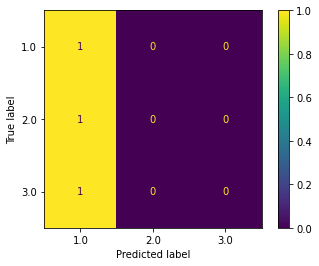

In [11]:
plot_confusion_matrix(model,X=Xtest, y_true=Ytest,normalize='true')